# Import libraries

In [1]:
# detection
from ultralytics import YOLO

# extracting text
import easyocr

# visuaziation
from utils.plots import Annotator, colors
from matplotlib import pyplot as plt
import cv2

# for clear predictions
from IPython.display import clear_output

# Read models

In [2]:
# yolov8 model for car, motorcycle, bus, truck detection
modelc = YOLO("models/yolov8s.pt")

# trainde model for number-palette detection
modeln = YOLO("models/num-pal.pt")

# extracting text from number-palette
reader = easyocr.Reader(['en'])

# Testing

### Testing image

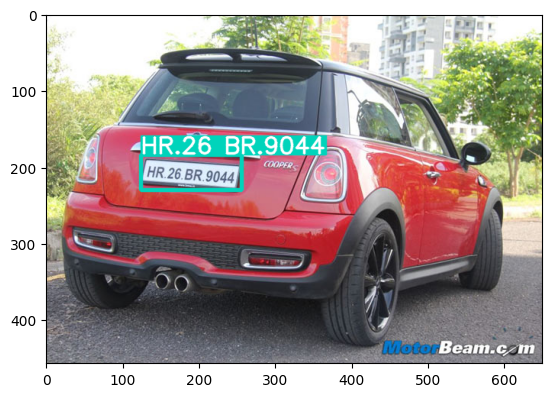

In [3]:
# read image
img = cv2.imread('images/test0.jpg')

for box in modelc(img)[0].boxes:   # detecting cars
    
    # if confidence>80% and [2,3,5,7] numbers is yolov8 detection class numbers
    if box.conf>0.8 and box.cls.item() in [2,3,5,7]:
        
        # extracting cars
        cx1,cy1,cx2,cy2 = box.xyxy[0]
        img_car = img[int(cy1):int(cy2),int(cx1):int(cx2)]
        
        for boxn in modeln(img_car)[0].boxes:   # detecting number-palette
            
            x1,y1,x2,y2 = boxn.xyxy[0]
            # drawing number-palette borders
            
            result = reader.readtext(img_car[int(y1):int(y2),int(x1):int(x2)])  # extracting text
            
            if result:
                # draw border and put text
                annotator = Annotator(img, line_width=3, example=str([result[0][-2]]))
                annotator.box_label((int(x1+cx1),int(y1+cy1),int(x2+cx1),int(y2+cy1)), result[0][-2], color=colors(9, True))

clear_output()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Testing video

In [ ]:
cap = cv2.VideoCapture('file_name.mp4')

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):
    ret, img = cap.read()
    if ret==True:
        for box in modelc(img)[0].boxes:   # detecting cars

            # if confidence>80% and [2,3,5,7] numbers is yolov8 detection class numbers
            if box.conf>0.8 and box.cls.item() in [2,3,5,7]:
        
                # extracting cars
                cx1,cy1,cx2,cy2 = box.xyxy[0]
                img_car = img[int(cy1):int(cy2),int(cx1):int(cx2)]

                for boxn in modeln(img_car)[0].boxes:   # detecting number-palette

                    x1,y1,x2,y2 = boxn.xyxy[0]
                    # drawing number-palette borders

                    result = reader.readtext(img_car[int(y1):int(y2),int(x1):int(x2)])  # extracting text

                    if result:
                        # draw border and put text
                        annotator = Annotator(img, line_width=3, example=str([result[0][-2]]))
                        annotator.box_label((int(x1+cx1),int(y1+cy1),int(x2+cx1),int(y2+cy1)), result[0][-2], color=colors(9, True))
        
        cv2.imshow('Frame', img)
          
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

clear_output()
cap.release()
cv2.destroyAllWindows()